# Generate project overview

In [1]:
import pandas as pd
from pathlib import Path, PurePath
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
from github2pandas_manager.config_parser import YAML_RequestDefinition
import aux

In [3]:
sys.path.append(os.path.join(sys.path[0],'..','..','FeedbackGeneration'))
from DataHandler import DataHandler

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
result_folder = "./example/notebooks/"
result_file_name = "F_TimeStatistics"

In [6]:
project_folder_name = "../"
project_parameter_file = "config.yml"

In [7]:
# Just for local testing purposes 
#project_folder_name = "./example/"

In [8]:
request_params = YAML_RequestDefinition(project_folder_name+project_parameter_file)
print(request_params.parameters.project_folder)

./example/data/TaskExamples


In [9]:
path = PurePath(os.getcwd())
if path.name == "notebooks":
    print(os.getcwd())
    os.chdir("../../")
    print(os.getcwd())

/home/zug/Desktop/github2pandas/GitHubClassroomTutorFeedback/example/notebooks
/home/zug/Desktop/github2pandas/GitHubClassroomTutorFeedback


In [10]:
dh = DataHandler(request_params.parameters.project_folder)

example/data/TaskExamples


In [11]:
dh.raw_pdCommits['team'] =  dh.raw_pdCommits['repo_name'].apply(aux.getTeamName)

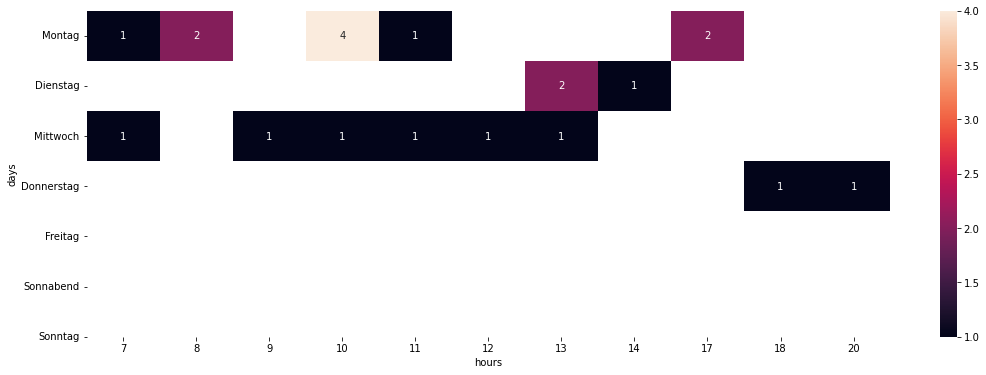

In [12]:
anonym_pdCommits = dh.raw_pdCommits
anonym_pdCommits['days'] = anonym_pdCommits.commited_at.dt.dayofweek
anonym_pdCommits['hours'] = anonym_pdCommits.commited_at.dt.hour
fig, ax = plt.subplots(figsize=(18,6))
y_axis_labels = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Sonnabend', 'Sonntag']

g = sns.heatmap(anonym_pdCommits.groupby(['days', 'hours'])['commited_at']\
                                             .count()\
                                             .unstack(), 
            annot=True, yticklabels=y_axis_labels, ax=ax)

plt.savefig(result_folder + result_file_name +'.png', dpi=400)
plt.show()